# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/GenAIFinalProject/

/content/drive/.shortcut-targets-by-id/1NRobIvPfe8wZ1Ic23kM6tSxOHAgre7Zk/GenAIFinalProject


In [ ]:
!pip install import-ipynb
!pip install importnb
!pip install ipynb
!pip install transformers==4.29.2
!pip install pytorch-ignite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 112.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.1 

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
import os
import itertools
import numpy as np
import argparse
import gdown
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
import pytorch_lightning as pl
import os.path as osp
import wandb
import gc

from tqdm import tqdm
from torchmetrics.image import PeakSignalNoiseRatio
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger


from resnet import resnet34
from attention import AttentionStack, LayerNorm, AddBroadcastPosEmbed
from utils import shift_dim

# Dataset Setup
Partially load dataset for detailed evaluation

In [ ]:
!wget data.csail.mit.edu/tofu/testset/vimeo_super_resolution_test.zip

--2024-05-03 19:18:29--  http://data.csail.mit.edu/tofu/testset/vimeo_super_resolution_test.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.131.233
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.csail.mit.edu/tofu/testset/vimeo_super_resolution_test.zip [following]
--2024-05-03 19:18:29--  https://data.csail.mit.edu/tofu/testset/vimeo_super_resolution_test.zip
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7195379410 (6.7G) [application/zip]
Saving to: ‘vimeo_super_resolution_test.zip’

vimeo_super_resolut 100%[===================>]   6.70G  36.9MB/s    in 3m 7s   

2024-05-03 19:21:37 (36.7 MB/s) - ‘vimeo_super_resolution_test.zip’ saved [7195379410/7195379410]



In [ ]:
!unzip vimeo_super_resolution_test.zip

Archive:  vimeo_super_resolution_test.zip
replace vimeo_super_resolution_test/sep_testlist.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!rm vimeo_super_resolution_test.zip

In [ ]:
!rm -rf vimeo_super_resolution_test/low_resolution/
!rm -rf vimeo_super_resolution_test/target/

In [ ]:
import random

f = open("./vimeo_super_resolution_test/sep_testlist.txt", "r")
l = list(f.read().split())
random.shuffle(l)
to_remove = l[1000:]
all_remove = ["vimeo_super_resolution_test/input/" + seq for seq in to_remove]
keep = l[:1000]

In [ ]:
keep = l[:1000]

In [ ]:
for seq in all_remove:
  !rm -rf seq


In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize
from torchvision.io import read_image
from PIL import Image
import random
import torch

class VimeoSepTuplet(Dataset):
    def __init__(self, data_root, seqs):
        """
        Creates a Vimeo Septuplet object.
        Inputs.
            data_root: Root path for the Vimeo dataset containing the sep tuples.
            is_training: Train/Test.
            input_frames: Which frames to input for frame interpolation network.
        """
        self.sequences = []

        for i in range(len(seqs)):
          try:
            print(i)
            seq = torch.zeros((3, 7, 64, 64))
            for j in range(7):
              img = read_image(data_root + seqs[i] + "/im" + str(j + 1) + ".png")
              img = Resize((64, 64))(img)
              seq[:, j, :, :] = img
            self.sequences.append(seq)
          except:
            continue
        self.data_root = data_root

    def __getitem__(self, index):
      return self.sequences[index]

    def __len__(self):
        return len(self.sequences)


dataset = VimeoSepTuplet("vimeo_super_resolution_test/input/", keep[:200])
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, pin_memory=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


# Imported Code
This code is from our other notebooks, copied directly from https://github.com/wilson1yan/VideoGPT

In [ ]:
# Shifts src_tf dim to dest dim
# i.e. shift_dim(x, 1, -1) would be (b, c, t, h, w) -> (b, t, h, w, c)
def shift_dim(x, src_dim=-1, dest_dim=-1, make_contiguous=True):
    n_dims = len(x.shape)
    if src_dim < 0:
        src_dim = n_dims + src_dim
    if dest_dim < 0:
        dest_dim = n_dims + dest_dim

    assert 0 <= src_dim < n_dims and 0 <= dest_dim < n_dims

    dims = list(range(n_dims))
    del dims[src_dim]

    permutation = []
    ctr = 0
    for i in range(n_dims):
        if i == dest_dim:
            permutation.append(src_dim)
        else:
            permutation.append(dims[ctr])
            ctr += 1
    x = x.permute(permutation)
    if make_contiguous:
        x = x.contiguous()
    return x

# reshapes tensor start from dim i (inclusive)
# to dim j (exclusive) to the desired shape
# e.g. if x.shape = (b, thw, c) then
# view_range(x, 1, 2, (t, h, w)) returns
# x of shape (b, t, h, w, c)
def view_range(x, i, j, shape):
    shape = tuple(shape)

    n_dims = len(x.shape)
    if i < 0:
        i = n_dims + i

    if j is None:
        j = n_dims
    elif j < 0:
        j = n_dims + j

    assert 0 <= i < j <= n_dims

    x_shape = x.shape
    target_shape = x_shape[:i] + shape + x_shape[j:]
    return x.view(target_shape)


def tensor_slice(x, begin, size):
    assert all([b >= 0 for b in begin])
    size = [l - b if s == -1 else s
            for s, b, l in zip(size, begin, x.shape)]
    assert all([s >= 0 for s in size])

    slices = [slice(b, b + s) for b, s in zip(begin, size)]
    return x[slices]

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.checkpoint import checkpoint


class AttentionStack(nn.Module):
    def __init__(
        self, shape, embd_dim, n_head, n_layer, dropout,
        attn_type, attn_dropout, class_cond_dim, frame_cond_shape,
    ):
        super().__init__()
        self.shape = shape
        self.embd_dim = embd_dim
        self.use_frame_cond = frame_cond_shape is not None

        self.right_shift = RightShift(embd_dim)
        self.pos_embd = AddBroadcastPosEmbed(
            shape=shape, embd_dim=embd_dim
        )

        self.attn_nets = nn.ModuleList(
            [
                AttentionBlock(
                    shape=shape,
                    embd_dim=embd_dim,
                    n_head=n_head,
                    n_layer=n_layer,
                    dropout=dropout,
                    attn_type=attn_type,
                    attn_dropout=attn_dropout,
                    class_cond_dim=class_cond_dim,
                    frame_cond_shape=frame_cond_shape
                )
                for i in range(n_layer)
            ]
        )

    def forward(self, x, cond, decode_step, decode_idx):
        """
        Args
        ------
            x: (b, d1, d2, ..., dn, embd_dim)
            cond: a dictionary of conditioning tensors

            (below is used only when sampling for fast decoding)
            decode: the enumerated rasterscan order of the current idx being sampled
            decode_step: a tuple representing the current idx being sampled
        """
        x = self.right_shift(x, decode_step)
        x = self.pos_embd(x, decode_step, decode_idx)
        for net in self.attn_nets:
            x = net(x, cond, decode_step, decode_idx)

        return x


class AttentionBlock(nn.Module):
    def __init__(self, shape, embd_dim, n_head, n_layer, dropout,
                 attn_type, attn_dropout, class_cond_dim, frame_cond_shape):
        super().__init__()
        self.use_frame_cond = frame_cond_shape is not None

        self.pre_attn_norm = LayerNorm(embd_dim, class_cond_dim)
        self.post_attn_dp = nn.Dropout(dropout)
        self.attn = MultiHeadAttention(shape, embd_dim, embd_dim, n_head,
                                       n_layer, causal=True, attn_type=attn_type,
                                       attn_kwargs=dict(attn_dropout=attn_dropout))

        if frame_cond_shape is not None:
            enc_len = np.prod(frame_cond_shape[:-1])
            self.pre_enc_norm = LayerNorm(embd_dim, class_cond_dim)
            self.post_enc_dp = nn.Dropout(dropout)
            self.enc_attn = MultiHeadAttention(shape, embd_dim, frame_cond_shape[-1],
                                               n_head, n_layer, attn_type='full',
                                               attn_kwargs=dict(attn_dropout=0.), causal=False)

        self.pre_fc_norm = LayerNorm(embd_dim, class_cond_dim)
        self.post_fc_dp = nn.Dropout(dropout)
        self.fc_block = nn.Sequential(
            nn.Linear(in_features=embd_dim, out_features=embd_dim * 4),
            GeLU2(),
            nn.Linear(in_features=embd_dim * 4, out_features=embd_dim),
        )

    def forward(self, x, cond, decode_step, decode_idx):
        h = self.pre_attn_norm(x, cond)
        if self.training:
            h = checkpoint(self.attn, h, h, h, decode_step, decode_idx)
        else:
            h = self.attn(h, h, h, decode_step, decode_idx)
        h = self.post_attn_dp(h)
        x = x + h

        if self.use_frame_cond:
            h = self.pre_enc_norm(x, cond)
            if self.training:
                h = checkpoint(self.enc_attn, h, cond['frame_cond'], cond['frame_cond'],
                               decode_step, decode_idx)
            else:
                h = self.enc_attn(h, cond['frame_cond'], cond['frame_cond'],
                                  decode_step, decode_idx)
            h = self.post_enc_dp(h)
            x = x + h

        h = self.pre_fc_norm(x, cond)
        if self.training:
            h = checkpoint(self.fc_block, h)
        else:
            h = self.fc_block(h)
        h = self.post_fc_dp(h)
        x = x + h

        return x


class MultiHeadAttention(nn.Module):
    def __init__(self, shape, dim_q, dim_kv, n_head, n_layer,
                 causal, attn_type, attn_kwargs):
        super().__init__()
        self.causal = causal
        self.shape = shape

        self.d_k = dim_q // n_head
        self.d_v = dim_kv // n_head
        self.n_head = n_head

        self.w_qs = nn.Linear(dim_q, n_head * self.d_k, bias=False) # q
        self.w_qs.weight.data.normal_(std=1.0 / np.sqrt(dim_q))

        self.w_ks = nn.Linear(dim_kv, n_head * self.d_k, bias=False) # k
        self.w_ks.weight.data.normal_(std=1.0 / np.sqrt(dim_kv))

        self.w_vs = nn.Linear(dim_kv, n_head * self.d_v, bias=False) # v
        self.w_vs.weight.data.normal_(std=1.0 / np.sqrt(dim_kv))

        self.fc = nn.Linear(n_head * self.d_v, dim_q, bias=True) # c
        self.fc.weight.data.normal_(std=1.0 / np.sqrt(dim_q * n_layer))

        if attn_type == 'full':
            self.attn = FullAttention(shape, causal, **attn_kwargs)
        elif attn_type == 'axial':
            assert not causal, 'causal axial attention is not supported'
            self.attn = AxialAttention(len(shape), **attn_kwargs)
        elif attn_type == 'sparse':
            self.attn = SparseAttention(shape, n_head, causal, **attn_kwargs)

        self.cache = None

    def forward(self, q, k, v, decode_step=None, decode_idx=None):
        """ Compute multi-head attention
        Args
            q, k, v: a [b, d1, ..., dn, c] tensor or
                     a [b, 1, ..., 1, c] tensor if decode_step is not None

        Returns
            The output after performing attention
        """

        # compute k, q, v
        d_k, d_v, n_head = self.d_k, self.d_v, self.n_head
        q = view_range(self.w_qs(q), -1, None, (n_head, d_k))
        k = view_range(self.w_ks(k), -1, None, (n_head, d_k))
        v = view_range(self.w_vs(v), -1, None, (n_head, d_v))

        # b x n_head x seq_len x d
        # (b, *d_shape, n_head, d) -> (b, n_head, *d_shape, d)
        q = shift_dim(q, -2, 1)
        k = shift_dim(k, -2, 1)
        v = shift_dim(v, -2, 1)

        # fast decoding
        if decode_step is not None:
            if decode_step == 0:
                if self.causal:
                    k_shape = (q.shape[0], n_head, *self.shape, self.d_k)
                    v_shape = (q.shape[0], n_head, *self.shape, self.d_v)
                    self.cache = dict(k=torch.zeros(k_shape, dtype=k.dtype, device=q.device),
                                    v=torch.zeros(v_shape, dtype=v.dtype, device=q.device))
                else:
                    # cache only once in the non-causal case
                    self.cache = dict(k=k.clone(), v=v.clone())
            if self.causal:
                idx = (slice(None, None), slice(None, None), *[slice(i, i+ 1) for i in decode_idx])
                self.cache['k'][idx] = k
                self.cache['v'][idx] = v
            k, v = self.cache['k'], self.cache['v']

        a = self.attn(q, k, v, decode_step, decode_idx)

        # (b, *d_shape, n_head, d) -> (b, *d_shape, n_head * d)
        a = shift_dim(a, 1, -2).flatten(start_dim=-2)
        a = self.fc(a) # (b x seq_len x embd_dim)

        return a

############## Attention #######################
class FullAttention(nn.Module):
    def __init__(self, shape, causal, attn_dropout):
        super().__init__()
        self.causal = causal
        self.attn_dropout = attn_dropout

        seq_len = np.prod(shape)
        if self.causal:
            self.register_buffer('mask', torch.tril(torch.ones(seq_len, seq_len)))

    def forward(self, q, k, v, decode_step, decode_idx):
        mask = self.mask if self.causal else None
        if decode_step is not None and mask is not None:
            mask = mask[[decode_step]]

        old_shape = q.shape[2:-1]
        q = q.flatten(start_dim=2, end_dim=-2)
        k = k.flatten(start_dim=2, end_dim=-2)
        v = v.flatten(start_dim=2, end_dim=-2)

        out = scaled_dot_product_attention(q, k, v, mask=mask,
                                           attn_dropout=self.attn_dropout,
                                           training=self.training)

        return view_range(out, 2, 3, old_shape)

class AxialAttention(nn.Module):
    def __init__(self, n_dim, axial_dim):
        super().__init__()
        if axial_dim < 0:
            axial_dim = 2 + n_dim + 1 + axial_dim
        else:
            axial_dim += 2 # account for batch, head, dim
        self.axial_dim = axial_dim

    def forward(self, q, k, v, decode_step, decode_idx):
        q = shift_dim(q, self.axial_dim, -2).flatten(end_dim=-3)
        k = shift_dim(k, self.axial_dim, -2).flatten(end_dim=-3)
        v = shift_dim(v, self.axial_dim, -2)
        old_shape = list(v.shape)
        v = v.flatten(end_dim=-3)

        out = scaled_dot_product_attention(q, k, v, training=self.training)
        out = out.view(*old_shape)
        out = shift_dim(out, -2, self.axial_dim)
        return out


class SparseAttention(nn.Module):
    ops = dict()
    attn_mask = dict()
    block_layout = dict()

    def __init__(self, shape, n_head, causal, num_local_blocks=4, block=32,
                 attn_dropout=0.): # does not use attn_dropout
        super().__init__()
        self.causal = causal
        self.shape = shape

        self.sparsity_config = StridedSparsityConfig(shape=shape, n_head=n_head,
                                                     causal=causal, block=block,
                                                     num_local_blocks=num_local_blocks)

        if self.shape not in SparseAttention.block_layout:
            SparseAttention.block_layout[self.shape] = self.sparsity_config.make_layout()
        if causal and self.shape not in SparseAttention.attn_mask:
            SparseAttention.attn_mask[self.shape] = self.sparsity_config.make_sparse_attn_mask()


    def forward(self, q, k, v, decode_step, decode_idx):

        SparseAttention.block_layout[self.shape] = SparseAttention.block_layout[self.shape].to(q)
        if self.causal:
            SparseAttention.attn_mask[self.shape] = SparseAttention.attn_mask[self.shape].to(q).type_as(q)
        attn_mask = SparseAttention.attn_mask[self.shape] if self.causal else None

        old_shape = q.shape[2:-1]
        q = q.flatten(start_dim=2, end_dim=-2)
        k = k.flatten(start_dim=2, end_dim=-2)
        v = v.flatten(start_dim=2, end_dim=-2)

        if decode_step is not None:
            mask = self.sparsity_config.get_non_block_layout_row(SparseAttention.block_layout[self.shape], decode_step)
            out = scaled_dot_product_attention(q, k, v, mask=mask, training=self.training)
        else:
            if q.shape != k.shape or k.shape != v.shape:
                raise Exception('SparseAttention only support self-attention')
            sparse_dot_sdd_nt, sparse_dot_dsd_nn, sparse_softmax = self.get_ops()
            scaling = float(q.shape[-1]) ** -0.5

            attn_output_weights = sparse_dot_sdd_nt(q, k)
            if attn_mask is not None:
                attn_output_weights = attn_output_weights.masked_fill(attn_mask == 0,
                                                                      float('-inf'))
            attn_output_weights = sparse_softmax(
                attn_output_weights,
                scale=scaling
            )

            out = sparse_dot_dsd_nn(attn_output_weights, v)

        return view_range(out, 2, 3, old_shape)


class StridedSparsityConfig(object):
    """
    Strided Sparse configuration specified in https://arxiv.org/abs/1904.10509 that
    generalizes to arbitrary dimensions
    """
    def __init__(self, shape, n_head, causal, block, num_local_blocks):
        self.n_head = n_head
        self.shape = shape
        self.causal = causal
        self.block = block
        self.num_local_blocks = num_local_blocks

        assert self.num_local_blocks >= 1, 'Must have at least 1 local block'
        assert self.seq_len % self.block == 0, 'seq len must be divisible by block size'

        self._block_shape = self._compute_block_shape()
        self._block_shape_cum = self._block_shape_cum_sizes()

    @property
    def seq_len(self):
        return np.prod(self.shape)

    @property
    def num_blocks(self):
        return self.seq_len // self.block

    def set_local_layout(self, layout):
        num_blocks = self.num_blocks
        for row in range(0, num_blocks):
            end = min(row + self.num_local_blocks, num_blocks)
            for col in range(
                    max(0, row - self.num_local_blocks),
                    (row + 1 if self.causal else end)):
                layout[:, row, col] = 1
        return layout

    def set_global_layout(self, layout):
        num_blocks = self.num_blocks
        n_dim = len(self._block_shape)
        for row in range(num_blocks):
            assert self._to_flattened_idx(self._to_unflattened_idx(row)) == row
            cur_idx = self._to_unflattened_idx(row)
            # no strided attention over last dim
            for d in range(n_dim - 1):
                end = self._block_shape[d]
                for i in range(0, (cur_idx[d] + 1 if self.causal else end)):
                    new_idx = list(cur_idx)
                    new_idx[d] = i
                    new_idx = tuple(new_idx)

                    col = self._to_flattened_idx(new_idx)
                    layout[:, row, col] = 1

        return layout

    def make_layout(self):
        layout = torch.zeros((self.n_head, self.num_blocks, self.num_blocks), dtype=torch.int64)
        layout = self.set_local_layout(layout)
        layout = self.set_global_layout(layout)
        return layout

    def make_sparse_attn_mask(self):
        block_layout = self.make_layout()
        assert block_layout.shape[1] == block_layout.shape[2] == self.num_blocks

        num_dense_blocks = block_layout.sum().item()
        attn_mask = torch.ones(num_dense_blocks, self.block, self.block)
        counter = 0
        for h in range(self.n_head):
            for i in range(self.num_blocks):
                for j in range(self.num_blocks):
                    elem = block_layout[h, i, j].item()
                    if elem == 1:
                        assert i >= j
                        if i == j: # need to mask within block on diagonals
                            attn_mask[counter] = torch.tril(attn_mask[counter])
                        counter += 1
        assert counter == num_dense_blocks

        return attn_mask.unsqueeze(0)

    def get_non_block_layout_row(self, block_layout, row):
        block_row = row // self.block
        block_row = block_layout[:, [block_row]] # n_head x 1 x n_blocks
        block_row = block_row.repeat_interleave(self.block, dim=-1)
        block_row[:, :, row + 1:] = 0.
        return block_row

    ############# Helper functions ##########################

    def _compute_block_shape(self):
        n_dim = len(self.shape)
        cum_prod = 1
        for i in range(n_dim - 1, -1, -1):
            cum_prod *= self.shape[i]
            if cum_prod > self.block:
                break
        assert cum_prod % self.block == 0
        new_shape = (*self.shape[:i], cum_prod // self.block)

        assert np.prod(new_shape) == np.prod(self.shape) // self.block

        return new_shape

    def _block_shape_cum_sizes(self):
        bs = np.flip(np.array(self._block_shape))
        return tuple(np.flip(np.cumprod(bs)[:-1])) + (1,)

    def _to_flattened_idx(self, idx):
        assert len(idx) == len(self._block_shape), f"{len(idx)} != {len(self._block_shape)}"
        flat_idx = 0
        for i in range(len(self._block_shape)):
            flat_idx += idx[i] * self._block_shape_cum[i]
        return flat_idx

    def _to_unflattened_idx(self, flat_idx):
        assert flat_idx < np.prod(self._block_shape)
        idx = []
        for i in range(len(self._block_shape)):
            idx.append(flat_idx // self._block_shape_cum[i])
            flat_idx %= self._block_shape_cum[i]
        return tuple(idx)


################ Spatiotemporal broadcasted positional embeddings ###############
class AddBroadcastPosEmbed(nn.Module):
    def __init__(self, shape, embd_dim, dim=-1):
        super().__init__()
        assert dim in [-1, 1] # only first or last dim supported
        self.shape = shape
        self.n_dim = n_dim = len(shape)
        self.embd_dim = embd_dim
        self.dim = dim

        assert embd_dim % n_dim == 0, f"{embd_dim} % {n_dim} != 0"
        self.emb = nn.ParameterDict({
             f'd_{i}': nn.Parameter(torch.randn(shape[i], embd_dim // n_dim) * 0.01
                                    if dim == -1 else
                                    torch.randn(embd_dim // n_dim, shape[i]) * 0.01)
             for i in range(n_dim)
        })

    def forward(self, x, decode_step=None, decode_idx=None):
        embs = []
        for i in range(self.n_dim):
            e = self.emb[f'd_{i}']
            if self.dim == -1:
                # (1, 1, ..., 1, self.shape[i], 1, ..., -1)
                e = e.view(1, *((1,) * i), self.shape[i], *((1,) * (self.n_dim - i - 1)), -1)
                e = e.expand(1, *self.shape, -1)
            else:
                e = e.view(1, -1, *((1,) * i), self.shape[i], *((1,) * (self.n_dim - i - 1)))
                e = e.expand(1, -1, *self.shape)
            embs.append(e)

        embs = torch.cat(embs, dim=self.dim)
        if decode_step is not None:
            embs = tensor_slice(embs, [0, *decode_idx, 0],
                                [x.shape[0], *(1,) * self.n_dim, x.shape[-1]])

        return x + embs

################# Helper Functions ###################################
def scaled_dot_product_attention(q, k, v, mask=None, attn_dropout=0., training=True):
    # Performs scaled dot-product attention over the second to last dimension dn

    # (b, n_head, d1, ..., dn, d)
    attn = torch.matmul(q, k.transpose(-1, -2))
    attn = attn / np.sqrt(q.shape[-1])
    if mask is not None:
        attn = attn.masked_fill(mask == 0, float('-inf'))
    attn_float = F.softmax(attn, dim=-1)
    attn = attn_float.type_as(attn) # b x n_head x d1 x ... x dn x d
    attn = F.dropout(attn, p=attn_dropout, training=training)

    a = torch.matmul(attn, v) # b x n_head x d1 x ... x dn x d

    return a


class RightShift(nn.Module):
    def __init__(self, embd_dim):
        super().__init__()
        self.embd_dim = embd_dim
        self.sos = nn.Parameter(torch.FloatTensor(embd_dim).normal_(std=0.02), requires_grad=True)

    def forward(self, x, decode_step):
        if decode_step is not None and decode_step > 0:
            return x

        x_shape = list(x.shape)
        x = x.flatten(start_dim=1, end_dim=-2) # (b, seq_len, embd_dim)
        sos = torch.ones(x_shape[0], 1, self.embd_dim, dtype=torch.float32).to(self.sos) * self.sos
        sos = sos.type_as(x)
        x = torch.cat([sos, x[:, :-1, :]], axis=1)
        x = x.view(*x_shape)

        return x


class GeLU2(nn.Module):
    def forward(self, x):
        return (1.702 * x).sigmoid() * x


class LayerNorm(nn.Module):
    def __init__(self, embd_dim, class_cond_dim):
        super().__init__()
        self.conditional = class_cond_dim is not None

        if self.conditional:
            self.w = nn.Linear(class_cond_dim, embd_dim, bias=False)
            nn.init.constant_(self.w.weight.data, 1. / np.sqrt(class_cond_dim))
            self.wb = nn.Linear(class_cond_dim, embd_dim, bias=False)
        else:
            self.g = nn.Parameter(torch.ones(embd_dim, dtype=torch.float32), requires_grad=True)
            self.b = nn.Parameter(torch.zeros(embd_dim, dtype=torch.float32), requires_grad=True)

    def forward(self, x, cond):
        if self.conditional:  # (b, cond_dim)
            g = 1 + self.w(cond['class_cond']).view(x.shape[0], *(1,)*(len(x.shape)-2), x.shape[-1]) # (b, ..., embd_dim)
            b = self.wb(cond['class_cond']).view(x.shape[0], *(1,)*(len(x.shape)-2), x.shape[-1])
        else:
            g = self.g  # (embd_dim,)
            b = self.b

        x_float = x.float()

        mu = x_float.mean(dim=-1, keepdims=True)
        s = (x_float - mu).square().mean(dim=-1, keepdims=True)
        x_float = (x_float - mu) * (1e-5 + s.rsqrt())  # (b, ..., embd_dim)
        x_float = x_float * g + b

        x = x_float.type_as(x)
        return x

In [ ]:
import math
import argparse
import numpy as np

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributed as dist
import wandb

N_RES = 4
N_HIDDEN = 120
N_CHANNELS = 128

class VQVAE(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.embedding_dim = N_CHANNELS
        self.n_codes = 2048

        self.encoder = Encoder(N_HIDDEN, N_RES, (1, 4, 4))
        self.decoder = Decoder(N_HIDDEN, N_RES, (1, 4, 4))

        self.pre_vq_conv = SamePadConv3d(N_HIDDEN, N_CHANNELS, 1)
        self.post_vq_conv = SamePadConv3d(N_CHANNELS, N_HIDDEN, 1)

        self.codebook = Codebook(2048, N_CHANNELS)
        self.save_hyperparameters()

    @property
    def latent_shape(self):
        input_shape = (self.args.sequence_length, self.args.resolution,
                       self.args.resolution)
        return tuple([s // d for s, d in zip(input_shape,
                                             self.args.downsample)])

    def encode(self, x, include_embeddings=False):
        h = self.pre_vq_conv(self.encoder(x))
        vq_output = self.codebook(h)
        if include_embeddings:
            return vq_output['encodings'], vq_output['embeddings']
        else:
            return vq_output['encodings']

    def decode(self, encodings):
        h = F.embedding(encodings, self.codebook.embeddings)
        h = self.post_vq_conv(shift_dim(h, -1, 1))
        return self.decoder(h)

    def forward(self, x):
        z = self.pre_vq_conv(self.encoder(x))
        vq_output = self.codebook(z)
        x_recon = self.decoder(self.post_vq_conv(vq_output['embeddings']))
        recon_loss = F.mse_loss(x_recon, x) / 0.06

        return recon_loss, x_recon, vq_output

    def training_step(self, batch, batch_idx):
        x = batch
        recon_loss, _, vq_output = self.forward(x)
        commitment_loss = vq_output['commitment_loss']
        loss = recon_loss + commitment_loss
        return loss

    def validation_step(self, batch, batch_idx):
        x = batch
        recon_loss, _, vq_output = self.forward(x)
        self.log('val/recon_loss', recon_loss, prog_bar=True)
        self.log('val/perplexity', vq_output['perplexity'], prog_bar=True)
        self.log('val/commitment_loss', vq_output['commitment_loss'], prog_bar=True)
        wandb.log({"val/recon_loss": recon_loss, "val/perplexity": vq_output['perplexity'], "val/commitment_loss": vq_output['commitment_loss']})

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=3e-4, betas=(0.9, 0.999))

class AxialBlock(nn.Module):
    def __init__(self, n_hiddens, n_head):
        super().__init__()
        kwargs = dict(shape=(0,) * 3, dim_q=n_hiddens,
                      dim_kv=n_hiddens, n_head=n_head,
                      n_layer=1, causal=False, attn_type='axial')
        self.attn_w = MultiHeadAttention(attn_kwargs=dict(axial_dim=-2),
                                         **kwargs)
        self.attn_h = MultiHeadAttention(attn_kwargs=dict(axial_dim=-3),
                                         **kwargs)
        self.attn_t = MultiHeadAttention(attn_kwargs=dict(axial_dim=-4),
                                         **kwargs)

    def forward(self, x):
        x = shift_dim(x, 1, -1)
        x = self.attn_w(x, x, x) + self.attn_h(x, x, x) + self.attn_t(x, x, x)
        x = shift_dim(x, -1, 1)
        return x


class AttentionResidualBlock(nn.Module):
    def __init__(self, n_hiddens):
        super().__init__()
        self.block = nn.Sequential(
            nn.BatchNorm3d(n_hiddens),
            nn.ReLU(),
            SamePadConv3d(n_hiddens, n_hiddens // 2, 3, bias=False),
            nn.BatchNorm3d(n_hiddens // 2),
            nn.ReLU(),
            SamePadConv3d(n_hiddens // 2, n_hiddens, 1, bias=False),
            nn.BatchNorm3d(n_hiddens),
            nn.ReLU(),
            AxialBlock(n_hiddens, 2)
        )

    def forward(self, x):
        return x + self.block(x)

class Codebook(nn.Module):
    def __init__(self, n_codes, embedding_dim):
        super().__init__()
        self.register_buffer('embeddings', torch.randn(n_codes, embedding_dim))
        self.register_buffer('N', torch.zeros(n_codes))
        self.register_buffer('z_avg', self.embeddings.data.clone())

        self.n_codes = n_codes
        self.embedding_dim = embedding_dim
        self._need_init = True

    def _tile(self, x):
        d, ew = x.shape
        if d < self.n_codes:
            n_repeats = (self.n_codes + d - 1) // d
            std = 0.01 / np.sqrt(ew)
            x = x.repeat(n_repeats, 1)
            x = x + torch.randn_like(x) * std
        return x

    def _init_embeddings(self, z):
        # z: [b, c, t, h, w]
        self._need_init = False
        flat_inputs = shift_dim(z, 1, -1).flatten(end_dim=-2)
        y = self._tile(flat_inputs)

        d = y.shape[0]
        _k_rand = y[torch.randperm(y.shape[0])][:self.n_codes]
        if dist.is_initialized():
            dist.broadcast(_k_rand, 0)
        self.embeddings.data.copy_(_k_rand)
        self.z_avg.data.copy_(_k_rand)
        self.N.data.copy_(torch.ones(self.n_codes))

    def forward(self, z):
        # z: [b, c, t, h, w]
        if self._need_init and self.training:
            self._init_embeddings(z)
        flat_inputs = shift_dim(z, 1, -1).flatten(end_dim=-2)
        distances = (flat_inputs ** 2).sum(dim=1, keepdim=True) \
                    - 2 * flat_inputs @ self.embeddings.t() \
                    + (self.embeddings.t() ** 2).sum(dim=0, keepdim=True)

        encoding_indices = torch.argmin(distances, dim=1)
        encode_onehot = F.one_hot(encoding_indices, self.n_codes).type_as(flat_inputs)
        encoding_indices = encoding_indices.view(z.shape[0], *z.shape[2:])

        embeddings = F.embedding(encoding_indices, self.embeddings)
        embeddings = shift_dim(embeddings, -1, 1)

        commitment_loss = 0.25 * F.mse_loss(z, embeddings.detach())

        # EMA codebook update
        if self.training:
            n_total = encode_onehot.sum(dim=0)
            encode_sum = flat_inputs.t() @ encode_onehot
            if dist.is_initialized():
                dist.all_reduce(n_total)
                dist.all_reduce(encode_sum)

            self.N.data.mul_(0.99).add_(n_total, alpha=0.01)
            self.z_avg.data.mul_(0.99).add_(encode_sum.t(), alpha=0.01)

            n = self.N.sum()
            weights = (self.N + 1e-7) / (n + self.n_codes * 1e-7) * n
            encode_normalized = self.z_avg / weights.unsqueeze(1)
            self.embeddings.data.copy_(encode_normalized)

            y = self._tile(flat_inputs)
            _k_rand = y[torch.randperm(y.shape[0])][:self.n_codes]
            if dist.is_initialized():
                dist.broadcast(_k_rand, 0)

            usage = (self.N.view(self.n_codes, 1) >= 1).float()
            self.embeddings.data.mul_(usage).add_(_k_rand * (1 - usage))

        embeddings_st = (embeddings - z).detach() + z

        avg_probs = torch.mean(encode_onehot, dim=0)
        perplexity = torch.exp(-torch.sum(avg_probs * torch.log(avg_probs + 1e-10)))

        return dict(embeddings=embeddings_st, encodings=encoding_indices,
                    commitment_loss=commitment_loss, perplexity=perplexity)

    def dictionary_lookup(self, encodings):
        embeddings = F.embedding(encodings, self.embeddings)
        return embeddings

class Encoder(nn.Module):
    def __init__(self, n_hiddens, n_res_layers, downsample):
        super().__init__()
        n_times_downsample = np.array([int(math.log2(d)) for d in downsample])
        self.convs = nn.ModuleList()
        max_ds = n_times_downsample.max()
        for i in range(max_ds):
            in_channels = 3 if i == 0 else n_hiddens
            stride = tuple([2 if d > 0 else 1 for d in n_times_downsample])
            conv = SamePadConv3d(in_channels, n_hiddens, 4, stride=stride)
            self.convs.append(conv)
            n_times_downsample -= 1
        self.conv_last = SamePadConv3d(in_channels, n_hiddens, kernel_size=3)

        self.res_stack = nn.Sequential(
            *[AttentionResidualBlock(n_hiddens)
              for _ in range(n_res_layers)],
            nn.BatchNorm3d(n_hiddens),
            nn.ReLU()
        )

    def forward(self, x):
        h = x
        for conv in self.convs:
            h = F.relu(conv(h))
        h = self.conv_last(h)
        h = self.res_stack(h)
        return h


class Decoder(nn.Module):
    def __init__(self, n_hiddens, n_res_layers, upsample):
        super().__init__()
        self.res_stack = nn.Sequential(
            *[AttentionResidualBlock(n_hiddens)
              for _ in range(n_res_layers)],
            nn.BatchNorm3d(n_hiddens),
            nn.ReLU()
        )

        n_times_upsample = np.array([int(math.log2(d)) for d in upsample])
        max_us = n_times_upsample.max()
        self.convts = nn.ModuleList()
        for i in range(max_us):
            out_channels = 3 if i == max_us - 1 else n_hiddens
            us = tuple([2 if d > 0 else 1 for d in n_times_upsample])
            convt = SamePadConvTranspose3d(n_hiddens, out_channels, 4,
                                           stride=us)
            self.convts.append(convt)
            n_times_upsample -= 1

    def forward(self, x):
        h = self.res_stack(x)
        for i, convt in enumerate(self.convts):
            h = convt(h)
            if i < len(self.convts) - 1:
                h = F.relu(h)
        return h


# Does not support dilation
class SamePadConv3d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, bias=True):
        super().__init__()
        if isinstance(kernel_size, int):
            kernel_size = (kernel_size,) * 3
        if isinstance(stride, int):
            stride = (stride,) * 3

        # assumes that the input shape is divisible by stride
        total_pad = tuple([k - s for k, s in zip(kernel_size, stride)])
        pad_input = []
        for p in total_pad[::-1]: # reverse since F.pad starts from last dim
            pad_input.append((p // 2 + p % 2, p // 2))
        pad_input = sum(pad_input, tuple())
        self.pad_input = pad_input

        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size,
                              stride=stride, padding=0, bias=bias)

    def forward(self, x):
        return self.conv(F.pad(x, self.pad_input))


class SamePadConvTranspose3d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, bias=True):
        super().__init__()
        if isinstance(kernel_size, int):
            kernel_size = (kernel_size,) * 3
        if isinstance(stride, int):
            stride = (stride,) * 3

        total_pad = tuple([k - s for k, s in zip(kernel_size, stride)])
        pad_input = []
        for p in total_pad[::-1]: # reverse since F.pad starts from last dim
            pad_input.append((p // 2 + p % 2, p // 2))
        pad_input = sum(pad_input, tuple())
        self.pad_input = pad_input

        self.convt = nn.ConvTranspose3d(in_channels, out_channels, kernel_size,
                                        stride=stride, bias=bias,
                                        padding=tuple([k - 1 for k in kernel_size]))

    def forward(self, x):
        return self.convt(F.pad(x, self.pad_input))

In [ ]:
def download(id, fname, root=os.path.expanduser('~/.cache/videogpt')):
    os.makedirs(root, exist_ok=True)
    destination = os.path.join(root, fname)

    if os.path.exists(destination):
        return destination

    gdown.download(id=id, output=destination, quiet=False)
    return destination

def load_vqvae(model_name, device=torch.device('cpu'), root=os.path.expanduser('~/.cache/videogpt')):
          filepath = download(_VQVAE[model_name], model_name, root=root)
          vqvae = VQVAE.load_from_checkpoint(filepath).to(device)
          vqvae.eval()
          return vqvae

In [ ]:
class VideoGPT(pl.LightningModule):
    def __init__(self, args):
        super().__init__()
        self.args = args

        # Load VQ-VAE and set all parameters to no grad
        if not os.path.exists(args.vqvae):
            self.vqvae = load_vqvae(args.vqvae)
        else:
            self.vqvae =  VQVAE.load_from_checkpoint(args.vqvae)
        for p in self.vqvae.parameters():
            p.requires_grad = False
        self.vqvae.codebook._need_init = False
        self.vqvae.eval()

        # ResNet34 for frame conditioning
        self.use_frame_cond = args.n_cond_frames > 0
        if self.use_frame_cond:
            frame_cond_shape = (args.n_cond_frames,
                                args.resolution // 4,
                                args.resolution // 4,
                                60)
            self.resnet = resnet34(1, (1, 4, 4), resnet_dim=60)
            self.cond_pos_embd = AddBroadcastPosEmbed(
                shape=frame_cond_shape[:-1], embd_dim=frame_cond_shape[-1]
            )
        else:
            frame_cond_shape = None

        # VideoGPT transformer
        # print(vars(self.vqvae))
        self.shape = (self.args.sequence_length, self.args.resolution // 4,
                       self.args.resolution // 4)

        self.fc_in = nn.Linear(self.vqvae.embedding_dim, args.hidden_dim, bias=False)
        self.fc_in.weight.data.normal_(std=0.02)

        self.attn_stack = AttentionStack(
            self.shape, args.hidden_dim, args.heads, args.layers, args.dropout,
            args.attn_type, args.attn_dropout, args.class_cond_dim, frame_cond_shape
        )

        self.norm = LayerNorm(args.hidden_dim, args.class_cond_dim)

        self.fc_out = nn.Linear(args.hidden_dim, self.vqvae.n_codes, bias=False)
        self.fc_out.weight.data.copy_(torch.zeros(self.vqvae.n_codes, args.hidden_dim))

        # caches for faster decoding (if necessary)
        self.frame_cond_cache = None

        self.save_hyperparameters()

    def get_reconstruction(self, videos):
        return self.vqvae.decode(self.vqvae.encode(videos))

    def sample(self, n, batch=None):
        device = self.fc_in.weight.device

        cond = dict()
        if self.use_frame_cond or self.args.class_cond:
            assert batch is not None
            video = batch['video']

            if self.args.class_cond:
                label = batch['label']
                cond['class_cond'] = F.one_hot(label, self.args.class_cond_dim).type_as(video)
            if self.use_frame_cond:
                cond['frame_cond'] = video[:, :, :self.args.n_cond_frames]

        samples = torch.zeros((n,) + self.shape).long().to(device)
        idxs = list(itertools.product(*[range(s) for s in self.shape]))

        with torch.no_grad():
            prev_idx = None
            for i, idx in enumerate(tqdm(idxs)):
                batch_idx_slice = (slice(None, None), *[slice(i, i + 1) for i in idx])
                batch_idx = (slice(None, None), *idx)
                embeddings = self.vqvae.codebook.dictionary_lookup(samples)

                if prev_idx is None:
                    # set arbitrary input values for the first token
                    # does not matter what value since it will be shifted anyways
                    embeddings_slice = embeddings[batch_idx_slice]
                    samples_slice = samples[batch_idx_slice]
                else:
                    embeddings_slice = embeddings[prev_idx]
                    samples_slice = samples[prev_idx]

                logits = self(embeddings_slice, samples_slice, cond,
                              decode_step=i, decode_idx=idx)[1]
                # squeeze all possible dim except batch dimension
                logits = logits.squeeze().unsqueeze(0) if logits.shape[0] == 1 else logits.squeeze()
                probs = F.softmax(logits, dim=-1)
                samples[batch_idx] = torch.multinomial(probs, 1).squeeze(-1)

                prev_idx = batch_idx_slice
            samples = self.vqvae.decode(samples)
            samples = torch.clamp(samples, -0.5, 0.5) + 0.5

        return samples # BCTHW in [0, 1]


    def forward(self, x, targets, cond, decode_step=None, decode_idx=None):
        if self.use_frame_cond:
            if decode_step is None:
                cond['frame_cond'] = self.cond_pos_embd(self.resnet(cond['frame_cond']))
            elif decode_step == 0:
                self.frame_cond_cache = self.cond_pos_embd(self.resnet(cond['frame_cond']))
                cond['frame_cond'] = self.frame_cond_cache
            else:
                cond['frame_cond'] = self.frame_cond_cache

        h = self.fc_in(x)
        h = self.attn_stack(h, cond, decode_step, decode_idx)
        h = self.norm(h, cond)
        logits = self.fc_out(h)
        loss = F.cross_entropy(shift_dim(logits, -1, 1), targets)

        return loss, logits

    def training_step(self, batch, batch_idx):
        self.vqvae.eval()
        x = batch
        cond = dict()
        if self.args.class_cond:
            label = batch['label']
            cond['class_cond'] = F.one_hot(label, self.args.class_cond_dim).type_as(x)
        if self.use_frame_cond:
            cond['frame_cond'] = x[:, :, :self.args.n_cond_frames].to(x.device)

        with torch.no_grad():
            targets, x = self.vqvae.encode(x, include_embeddings=True)
            x = shift_dim(x, 1, -1)

        loss, logits = self(x, targets, cond)
        return loss, logits

    def validation_step(self, batch, batch_idx):
        loss = self.training_step(batch, batch_idx)
        self.log('val/loss', loss, prog_bar=True)


In [ ]:
root = "/content/drive/MyDrive/GenAIFinalProject/"

class Args(argparse.Namespace):
    data_path = root+'Data'
    vqvae = root+'VideoGPT VQ-VAE/jpn9i0q0/checkpoints/epoch=44-step=29340.ckpt'
    n_cond_frames = 16
    resolution = 64
    sequence_length = 31
    batch_sizAe = 1
    num_workers = 8
    hidden_dim = 288
    max_steps = 100
    max_epochs = 100
    heads = 4
    layers = 5 # 6
    dropout = 0.2
    attn_type = "full"
    attn_dropout = 0.3
    class_cond = None
    gpus = 1

def main():
    pl.seed_everything(1234)
    args = Args()


    args.class_cond_dim = None
    model = VideoGPT(args)
    checkpoint = torch.load('./VideoGPT VQ-VAE/j6tb1kpi/checkpoints/epoch=34-step=11025.ckpt')

    model.load_state_dict(checkpoint['state_dict'], strict=False)
    model.eval()
    return model

model = main()

INFO:lightning_fabric.utilities.seed:Seed set to 1234


# Displaying Results

In [ ]:
# This reformats shorter sequences using pattern as the transfer function
def restructure(seq, pattern):
  start = 31 - sum(pattern)
  full = torch.zeros((1, 3, 31, 64, 64))

  aves = torch.mean(seq, 0)

  for i in range(seq.shape[0]):
    full[:, i, :, :, :] = aves[i]

  offset = 0
  for i in range(len(pattern)):
    for j in range(pattern[i]):
      full[:, :, start + offset, :, :] = seq[:, 2 * i, :, :]
      offset += 1
  return (full / 255) - 0.5

In [ ]:
gc.collect()
torch.cuda.empty_cache()
# This predicts the next sequence
def predict(model, seq, patterns):
  copy = seq.detach().clone()
  original = seq
  seq = copy

  for i in range(len(patterns)):
    reversed = bool(i >= ((len(patterns) + 1) // 2))
    pattern = patterns[i]
    cutoff = seq.shape[1] - 2 * min(i, len(patterns) - i) - 2 + 2 * int(reversed)

    temp = seq
    if reversed:
      temp = torch.flip(temp, [1]).detach().clone()
    full = restructure(temp[:, :cutoff, :, :], pattern).to("cuda")
    model = model.to("cuda")

    next = model.training_step(full, full)
    vals = torch.argmax(next[1], dim=4)
    recon = model.vqvae.decode(vals)
    seq[:, seq.shape[1] - 2 - 2 * i, :, :] = (recon[:, :, 30, :, :] - torch.min(recon)) / (torch.max(recon) - torch.min(recon)) * 255

  return seq, original

seq, original = predict(model, dataset[7], [[2, 1, 2], [2, 1], [2, 1, 2]])

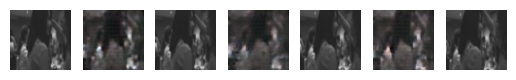

In [ ]:
# Visualization code
import matplotlib.pyplot as plt

seq_vis = torch.round(seq.permute(1, 2, 3, 0)) # THWC
original_vis = torch.round(original.permute(1, 2, 3, 0))

f, axarr = plt.subplots(1, seq_vis.shape[0])

for i in range(seq_vis.shape[0]):
  axarr[i].axis("off")
  plot = axarr[i].imshow(seq_vis[i, :, :, :].numpy() / 255)

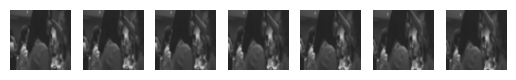

In [ ]:
f, axarr = plt.subplots(1, original_vis.shape[0])
for i in range(seq_vis.shape[0]):
  axarr[i].axis("off")
  plot = axarr[i].imshow(original_vis[i, :, :, :].numpy() / 255)

# Metrics
Calculate metrics

In [ ]:
# Loops through and evaluates data
from ignite.metrics import PSNR, SSIM
from ignite.engine import *

PATTERN = [[10, 10, 8], [15, 15], [8, 10, 10]]

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
PSNR(data_range=1.0).attach(default_evaluator, 'psnr')
SSIM(data_range=1.0).attach(default_evaluator, 'ssim')

n = 0
running_psnr = 0
running_ssim = 0

print(model.device)

for x in tqdm(dataloader):
  seq, original = predict(model, x[0], PATTERN)
  state = default_evaluator.run([[seq / 255, original / 255]])
  running_psnr = (n * running_psnr + state.metrics['psnr']) / (n + 1)
  running_ssim = (n * running_ssim + state.metrics['ssim']) / (n + 1)
  n += 1
  print(f"PSNR: {running_psnr}, SSIM: {running_ssim}")



cuda:0


  1%|          | 1/181 [00:00<01:23,  2.15it/s]

PSNR: 22.007147204020743, SSIM: 0.7620615952366743


  1%|          | 2/181 [00:00<01:20,  2.21it/s]

PSNR: 21.00124427701092, SSIM: 0.7391883119405962


  2%|▏         | 3/181 [00:01<01:18,  2.26it/s]

PSNR: 20.098622101653472, SSIM: 0.7059391086234847


  2%|▏         | 4/181 [00:01<01:17,  2.28it/s]

PSNR: 20.76195549521986, SSIM: 0.7169875701912409


  3%|▎         | 5/181 [00:02<01:16,  2.30it/s]

PSNR: 20.734129030667937, SSIM: 0.7174948248831057


  3%|▎         | 6/181 [00:02<01:15,  2.32it/s]

PSNR: 20.46645458499457, SSIM: 0.7063112391847333


  4%|▍         | 7/181 [00:03<01:14,  2.33it/s]

PSNR: 20.894500002655793, SSIM: 0.7235597112625689


  4%|▍         | 8/181 [00:03<01:14,  2.33it/s]

PSNR: 20.72648298539422, SSIM: 0.7242385413535889


  5%|▍         | 9/181 [00:03<01:13,  2.34it/s]

PSNR: 20.51215055120544, SSIM: 0.7255941115032642


  6%|▌         | 10/181 [00:04<01:13,  2.34it/s]

PSNR: 20.57739195817261, SSIM: 0.7238578339081586


  6%|▌         | 11/181 [00:04<01:12,  2.34it/s]

PSNR: 21.064765257587645, SSIM: 0.7387892062902204


  7%|▋         | 12/181 [00:05<01:12,  2.34it/s]

PSNR: 21.182008310368804, SSIM: 0.742633266570072


  7%|▋         | 13/181 [00:05<01:11,  2.34it/s]

PSNR: 20.95452553292373, SSIM: 0.736640090460467


  8%|▊         | 14/181 [00:06<01:11,  2.33it/s]

PSNR: 20.92692560780534, SSIM: 0.7367536325252237


  8%|▊         | 15/181 [00:06<01:11,  2.33it/s]

PSNR: 20.829542282788566, SSIM: 0.7360236575698933


  9%|▉         | 16/181 [00:06<01:10,  2.33it/s]

PSNR: 20.638895051128515, SSIM: 0.731815833253953


  9%|▉         | 17/181 [00:07<01:10,  2.32it/s]

PSNR: 20.51767431745907, SSIM: 0.7317361269719806


 10%|▉         | 18/181 [00:07<01:10,  2.33it/s]

PSNR: 20.507288977580725, SSIM: 0.7307447002277822


 10%|█         | 19/181 [00:08<01:09,  2.33it/s]

PSNR: 20.44507182532174, SSIM: 0.7318404125830549


 11%|█         | 20/181 [00:08<01:09,  2.32it/s]

PSNR: 20.372414251066083, SSIM: 0.7337830019514466


 12%|█▏        | 21/181 [00:09<01:08,  2.33it/s]

PSNR: 20.561740511586965, SSIM: 0.7340859114910064


 12%|█▏        | 22/181 [00:09<01:08,  2.33it/s]

PSNR: 20.522944310179643, SSIM: 0.7341236948079789


 13%|█▎        | 23/181 [00:09<01:07,  2.33it/s]

PSNR: 20.438845932412526, SSIM: 0.7336407269345991


 13%|█▎        | 24/181 [00:10<01:07,  2.33it/s]

PSNR: 20.31936393933759, SSIM: 0.7316958577997857


 14%|█▍        | 25/181 [00:10<01:07,  2.32it/s]

PSNR: 20.246264302253508, SSIM: 0.7332701781502626


 14%|█▍        | 26/181 [00:11<01:06,  2.32it/s]

PSNR: 20.181255463987892, SSIM: 0.7314179190646554


 15%|█▍        | 27/181 [00:11<01:06,  2.32it/s]

PSNR: 20.082423695305007, SSIM: 0.7322468516010824


 15%|█▌        | 28/181 [00:12<01:05,  2.32it/s]

PSNR: 20.067756310556835, SSIM: 0.7314090085247419


 16%|█▌        | 29/181 [00:12<01:05,  2.32it/s]

PSNR: 19.985155317833645, SSIM: 0.7314719059958137


 17%|█▋        | 30/181 [00:12<01:05,  2.32it/s]

PSNR: 19.968786059001935, SSIM: 0.7305327338843968


 17%|█▋        | 31/181 [00:13<01:04,  2.32it/s]

PSNR: 20.003953863204575, SSIM: 0.7271433643262009


 18%|█▊        | 32/181 [00:13<01:04,  2.32it/s]

PSNR: 20.016730552438407, SSIM: 0.7269755495425899


 18%|█▊        | 33/181 [00:14<01:03,  2.32it/s]

PSNR: 20.06135395501833, SSIM: 0.7275756594490413


 19%|█▉        | 34/181 [00:14<01:03,  2.32it/s]

PSNR: 20.13044295259716, SSIM: 0.7309314000633719


 19%|█▉        | 35/181 [00:15<01:02,  2.32it/s]

PSNR: 20.20806730211253, SSIM: 0.7350208032114706


 20%|█▉        | 36/181 [00:15<01:02,  2.33it/s]

PSNR: 20.204401352903332, SSIM: 0.7333653460796878


 20%|██        | 37/181 [00:15<01:01,  2.33it/s]

PSNR: 20.172572946742903, SSIM: 0.7320780020459087


 21%|██        | 38/181 [00:16<01:01,  2.34it/s]

PSNR: 20.232699439456667, SSIM: 0.7316625672055964


 22%|██▏       | 39/181 [00:16<01:00,  2.34it/s]

PSNR: 20.228980662889303, SSIM: 0.7315434412509177


 22%|██▏       | 40/181 [00:17<01:00,  2.34it/s]

PSNR: 20.181954767213625, SSIM: 0.7291650412191997


 23%|██▎       | 41/181 [00:17<00:59,  2.34it/s]

PSNR: 20.264935032943345, SSIM: 0.731527078471824


 23%|██▎       | 42/181 [00:18<00:59,  2.34it/s]

PSNR: 20.301523741391414, SSIM: 0.7313123986117382


 24%|██▍       | 43/181 [00:18<00:58,  2.34it/s]

PSNR: 20.271577224034512, SSIM: 0.7337163013894208


 24%|██▍       | 44/181 [00:18<00:58,  2.34it/s]

PSNR: 20.283516125447445, SSIM: 0.7335979191257312


 25%|██▍       | 45/181 [00:19<00:58,  2.33it/s]

PSNR: 20.300048474544056, SSIM: 0.7342036077824186


 25%|██▌       | 46/181 [00:19<00:57,  2.34it/s]

PSNR: 20.308573760146786, SSIM: 0.7332657197050021


 26%|██▌       | 47/181 [00:20<00:57,  2.32it/s]

PSNR: 20.307781820435977, SSIM: 0.7343149420514642


 27%|██▋       | 48/181 [00:20<00:57,  2.32it/s]

PSNR: 20.302094135459853, SSIM: 0.7344398842620312


 27%|██▋       | 49/181 [00:21<00:56,  2.32it/s]

PSNR: 20.34601001350854, SSIM: 0.7351336352420887


 28%|██▊       | 50/181 [00:21<00:56,  2.32it/s]

PSNR: 20.34409182587398, SSIM: 0.7350924419908221


 28%|██▊       | 51/181 [00:21<00:55,  2.33it/s]

PSNR: 20.3120766403563, SSIM: 0.7340749181853622


 29%|██▊       | 52/181 [00:22<00:55,  2.33it/s]

PSNR: 20.26752189101501, SSIM: 0.7314470020509481


 29%|██▉       | 53/181 [00:22<00:54,  2.33it/s]

PSNR: 20.20770885296021, SSIM: 0.7295401308904205


 30%|██▉       | 54/181 [00:23<00:54,  2.34it/s]

PSNR: 20.17219341587622, SSIM: 0.7308590242892492


 30%|███       | 55/181 [00:23<00:53,  2.34it/s]

PSNR: 20.20187523980343, SSIM: 0.73101500068349


 31%|███       | 56/181 [00:24<00:53,  2.34it/s]

PSNR: 20.183691465387565, SSIM: 0.7318202032789952


 31%|███▏      | 57/181 [00:24<00:52,  2.34it/s]

PSNR: 20.170292581939734, SSIM: 0.7319278222458873


 32%|███▏      | 58/181 [00:24<00:52,  2.34it/s]

PSNR: 20.08535149309045, SSIM: 0.7297853814022273


 33%|███▎      | 59/181 [00:25<00:52,  2.34it/s]

PSNR: 20.083459589645656, SSIM: 0.7301240629528414


 33%|███▎      | 60/181 [00:25<00:51,  2.34it/s]

PSNR: 20.12153953393116, SSIM: 0.7309314248624259


 34%|███▎      | 61/181 [00:26<00:51,  2.35it/s]

PSNR: 20.14970650781744, SSIM: 0.7317266412536035


 34%|███▍      | 62/181 [00:26<00:50,  2.34it/s]

PSNR: 20.1252201950793, SSIM: 0.7307504140392468


 35%|███▍      | 63/181 [00:27<00:50,  2.35it/s]

PSNR: 20.16879165298661, SSIM: 0.7316456467572507


 35%|███▌      | 64/181 [00:27<00:49,  2.35it/s]

PSNR: 20.095404588933846, SSIM: 0.7308449874376783


 36%|███▌      | 65/181 [00:27<00:49,  2.35it/s]

PSNR: 20.087617183539667, SSIM: 0.7312176181212329


 36%|███▋      | 66/181 [00:28<00:48,  2.35it/s]

PSNR: 20.040202787449, SSIM: 0.7301597315736604


 37%|███▋      | 67/181 [00:28<00:48,  2.35it/s]

PSNR: 20.017565457806832, SSIM: 0.729161559886499


 38%|███▊      | 68/181 [00:29<00:48,  2.35it/s]

PSNR: 20.076531101818468, SSIM: 0.7305200588273478


 38%|███▊      | 69/181 [00:29<00:47,  2.35it/s]

PSNR: 20.058810253358626, SSIM: 0.7294240656296491


 39%|███▊      | 70/181 [00:30<00:47,  2.35it/s]

PSNR: 20.077732993624295, SSIM: 0.7294788186417307


 39%|███▉      | 71/181 [00:30<00:46,  2.35it/s]

PSNR: 20.1041328444268, SSIM: 0.7300174190485866


 40%|███▉      | 72/181 [00:30<00:46,  2.34it/s]

PSNR: 20.13061803292914, SSIM: 0.7315184219394094


 40%|████      | 73/181 [00:31<00:46,  2.34it/s]

PSNR: 20.184635645993847, SSIM: 0.7320364266940028


 41%|████      | 74/181 [00:31<00:45,  2.35it/s]

PSNR: 20.227812312272885, SSIM: 0.7337361412015373


 41%|████▏     | 75/181 [00:32<00:45,  2.35it/s]

PSNR: 20.227263668176327, SSIM: 0.7339808423186805


 42%|████▏     | 76/181 [00:32<00:45,  2.32it/s]

PSNR: 20.230032719855718, SSIM: 0.7346287393018758


 43%|████▎     | 77/181 [00:33<00:44,  2.32it/s]

PSNR: 20.197470003965275, SSIM: 0.7336291341526572


 43%|████▎     | 78/181 [00:33<00:44,  2.32it/s]

PSNR: 20.182349723286286, SSIM: 0.7328304061748682


 44%|████▎     | 79/181 [00:33<00:44,  2.31it/s]

PSNR: 20.183873424909713, SSIM: 0.7327270564517502


 44%|████▍     | 80/181 [00:34<00:43,  2.32it/s]

PSNR: 20.192288554603728, SSIM: 0.7325850331697672


 45%|████▍     | 81/181 [00:34<00:43,  2.32it/s]

PSNR: 20.196519114811228, SSIM: 0.7331395867505212


 45%|████▌     | 82/181 [00:35<00:42,  2.32it/s]

PSNR: 20.20704125543162, SSIM: 0.7326831394963994


 46%|████▌     | 83/181 [00:35<00:42,  2.31it/s]

PSNR: 20.205249323138883, SSIM: 0.7319171114631898


 46%|████▋     | 84/181 [00:36<00:41,  2.32it/s]

PSNR: 20.273901658745448, SSIM: 0.7331420622491829


 47%|████▋     | 85/181 [00:36<00:41,  2.33it/s]

PSNR: 20.247554816848126, SSIM: 0.7326161312669008


 48%|████▊     | 86/181 [00:36<00:40,  2.32it/s]

PSNR: 20.24257130816493, SSIM: 0.7323980892142844


 48%|████▊     | 87/181 [00:37<00:40,  2.32it/s]

PSNR: 20.19757908705333, SSIM: 0.7316389744126285


 49%|████▊     | 88/181 [00:37<00:40,  2.31it/s]

PSNR: 20.178169866553517, SSIM: 0.732083324970553


 49%|████▉     | 89/181 [00:38<00:39,  2.32it/s]

PSNR: 20.17548285250798, SSIM: 0.7315282991380653


 50%|████▉     | 90/181 [00:38<00:39,  2.32it/s]

PSNR: 20.192100001609486, SSIM: 0.7323738482512892


 50%|█████     | 91/181 [00:39<00:38,  2.32it/s]

PSNR: 20.22238810288552, SSIM: 0.7329760459471895


 51%|█████     | 92/181 [00:39<00:38,  2.32it/s]

PSNR: 20.224846963339846, SSIM: 0.7327562804069406


 51%|█████▏    | 93/181 [00:39<00:37,  2.32it/s]

PSNR: 20.20301326527779, SSIM: 0.7320286167769214


 52%|█████▏    | 94/181 [00:40<00:37,  2.32it/s]

PSNR: 20.202410243924053, SSIM: 0.7323118214665757


 52%|█████▏    | 95/181 [00:40<00:37,  2.32it/s]

PSNR: 20.179074426637587, SSIM: 0.7326518772567202


 53%|█████▎    | 96/181 [00:41<00:36,  2.32it/s]

PSNR: 20.16513150469286, SSIM: 0.7327228626418559


 54%|█████▎    | 97/181 [00:41<00:36,  2.32it/s]

PSNR: 20.167739622829664, SSIM: 0.7324949154379843


 54%|█████▍    | 98/181 [00:42<00:35,  2.32it/s]

PSNR: 20.14849549322409, SSIM: 0.7325781842964214


 55%|█████▍    | 99/181 [00:42<00:35,  2.32it/s]

PSNR: 20.13137446481933, SSIM: 0.7321130817140474


 55%|█████▌    | 100/181 [00:42<00:34,  2.32it/s]

PSNR: 20.130820619076086, SSIM: 0.7324053484233777


 56%|█████▌    | 101/181 [00:43<00:34,  2.32it/s]

PSNR: 20.134383189656592, SSIM: 0.7322876474568684


 56%|█████▋    | 102/181 [00:43<00:34,  2.32it/s]

PSNR: 20.154318269906366, SSIM: 0.7324740256281381


 57%|█████▋    | 103/181 [00:44<00:33,  2.32it/s]

PSNR: 20.114783698641585, SSIM: 0.7313222187514522


 57%|█████▋    | 104/181 [00:44<00:33,  2.32it/s]

PSNR: 20.093450833405633, SSIM: 0.7305053484736251


 58%|█████▊    | 105/181 [00:45<00:32,  2.32it/s]

PSNR: 20.08076137113731, SSIM: 0.730443502534626


 59%|█████▊    | 106/181 [00:45<00:32,  2.32it/s]

PSNR: 20.06922645168465, SSIM: 0.7299722407692646


 59%|█████▉    | 107/181 [00:45<00:31,  2.31it/s]

PSNR: 20.095604411265896, SSIM: 0.7298725051664509


 60%|█████▉    | 108/181 [00:46<00:31,  2.32it/s]

PSNR: 20.08587672508635, SSIM: 0.7297395343959332


 60%|██████    | 109/181 [00:46<00:31,  2.30it/s]

PSNR: 20.081401898931777, SSIM: 0.7298380453513242


 61%|██████    | 110/181 [00:47<00:30,  2.31it/s]

PSNR: 20.087804428484098, SSIM: 0.729791862762941


 61%|██████▏   | 111/181 [00:47<00:30,  2.31it/s]

PSNR: 20.035138135585672, SSIM: 0.7291124499833554


 62%|██████▏   | 112/181 [00:48<00:29,  2.32it/s]

PSNR: 20.045127940616805, SSIM: 0.7296808279923531


 62%|██████▏   | 113/181 [00:48<00:29,  2.32it/s]

PSNR: 20.03242961665656, SSIM: 0.7299947679455515


 63%|██████▎   | 114/181 [00:49<00:28,  2.33it/s]

PSNR: 20.054501515994865, SSIM: 0.7302617569678704


 64%|██████▎   | 115/181 [00:49<00:28,  2.34it/s]

PSNR: 20.048528410236298, SSIM: 0.7300576082516638


 64%|██████▍   | 116/181 [00:49<00:27,  2.34it/s]

PSNR: 20.032113941109092, SSIM: 0.729669253462798


 65%|██████▍   | 117/181 [00:50<00:27,  2.34it/s]

PSNR: 20.03425223021735, SSIM: 0.7292648001227918


 65%|██████▌   | 118/181 [00:50<00:26,  2.35it/s]

PSNR: 20.031108599856914, SSIM: 0.7286832809038634


 66%|██████▌   | 119/181 [00:51<00:26,  2.35it/s]

PSNR: 20.056050845546864, SSIM: 0.7288036129475743


 66%|██████▋   | 120/181 [00:51<00:25,  2.35it/s]

PSNR: 20.05600980817575, SSIM: 0.7283331116189


 67%|██████▋   | 121/181 [00:51<00:25,  2.33it/s]

PSNR: 20.057042016291234, SSIM: 0.7282995926800108


 67%|██████▋   | 122/181 [00:52<00:25,  2.34it/s]

PSNR: 20.046150812583395, SSIM: 0.7282361264364794


 68%|██████▊   | 123/181 [00:52<00:24,  2.34it/s]

PSNR: 20.071545694653306, SSIM: 0.7287330440873538


 69%|██████▊   | 124/181 [00:53<00:24,  2.34it/s]

PSNR: 20.044751262368894, SSIM: 0.7283626990578524


 69%|██████▉   | 125/181 [00:53<00:23,  2.35it/s]

PSNR: 20.032553343339078, SSIM: 0.7281492171393116


 70%|██████▉   | 126/181 [00:54<00:23,  2.35it/s]

PSNR: 20.05564305380012, SSIM: 0.7283843269751084


 70%|███████   | 127/181 [00:54<00:22,  2.35it/s]

PSNR: 20.059022928760335, SSIM: 0.7284773160712402


 71%|███████   | 128/181 [00:54<00:22,  2.35it/s]

PSNR: 20.048896106984934, SSIM: 0.7284223887719475


 71%|███████▏  | 129/181 [00:55<00:22,  2.35it/s]

PSNR: 20.055906667258856, SSIM: 0.7284981551739438


 72%|███████▏  | 130/181 [00:55<00:21,  2.35it/s]

PSNR: 20.06198155271317, SSIM: 0.7283452236026884


 72%|███████▏  | 131/181 [00:56<00:21,  2.34it/s]

PSNR: 20.057795217461194, SSIM: 0.728464829196027


 73%|███████▎  | 132/181 [00:56<00:20,  2.34it/s]

PSNR: 20.050123847845217, SSIM: 0.7282359537579551


 73%|███████▎  | 133/181 [00:57<00:20,  2.32it/s]

PSNR: 20.045488869377944, SSIM: 0.7277780971791795


 74%|███████▍  | 134/181 [00:57<00:20,  2.33it/s]

PSNR: 20.056295167808624, SSIM: 0.7277111074222056


 75%|███████▍  | 135/181 [00:57<00:19,  2.31it/s]

PSNR: 20.052687020610676, SSIM: 0.7278336929178748


 75%|███████▌  | 136/181 [00:58<00:19,  2.32it/s]

PSNR: 20.040271777434565, SSIM: 0.7278712383001359


 76%|███████▌  | 137/181 [00:58<00:18,  2.32it/s]

PSNR: 20.035869749362202, SSIM: 0.7275766021010642


 76%|███████▌  | 138/181 [00:59<00:18,  2.32it/s]

PSNR: 20.017094053840836, SSIM: 0.7280822188288921


 77%|███████▋  | 139/181 [00:59<00:18,  2.33it/s]

PSNR: 20.009657627559907, SSIM: 0.7279618042749105


 77%|███████▋  | 140/181 [01:00<00:17,  2.33it/s]

PSNR: 20.02891570874283, SSIM: 0.7280501012500918


 78%|███████▊  | 141/181 [01:00<00:17,  2.34it/s]

PSNR: 20.035920254039347, SSIM: 0.727872225403315


 78%|███████▊  | 142/181 [01:00<00:16,  2.35it/s]

PSNR: 20.02298834256388, SSIM: 0.7281367415725829


 79%|███████▉  | 143/181 [01:01<00:16,  2.35it/s]

PSNR: 20.050631633586576, SSIM: 0.7285665449719007


 80%|███████▉  | 144/181 [01:01<00:15,  2.34it/s]

PSNR: 20.050706480168593, SSIM: 0.7287362864286221


 80%|████████  | 145/181 [01:02<00:15,  2.35it/s]

PSNR: 20.041412057582853, SSIM: 0.7292539229898963


 81%|████████  | 146/181 [01:02<00:14,  2.35it/s]

PSNR: 20.052987086568567, SSIM: 0.7297786389880508


 81%|████████  | 147/181 [01:03<00:14,  2.35it/s]

PSNR: 20.034905965815547, SSIM: 0.7296122861415176


 82%|████████▏ | 148/181 [01:03<00:14,  2.36it/s]

PSNR: 20.020850387513835, SSIM: 0.7290825868699558


 82%|████████▏ | 149/181 [01:03<00:13,  2.36it/s]

PSNR: 20.00278296254533, SSIM: 0.7291021088964327


 83%|████████▎ | 150/181 [01:04<00:13,  2.36it/s]

PSNR: 19.979537039948593, SSIM: 0.7291689629152165


 83%|████████▎ | 151/181 [01:04<00:12,  2.36it/s]

PSNR: 20.010329035693687, SSIM: 0.7301318930491539


 84%|████████▍ | 152/181 [01:05<00:12,  2.36it/s]

PSNR: 20.022608521700874, SSIM: 0.7301644199621254


 85%|████████▍ | 153/181 [01:05<00:11,  2.36it/s]

PSNR: 20.0201929565986, SSIM: 0.7301669984178262


 85%|████████▌ | 154/181 [01:06<00:11,  2.36it/s]

PSNR: 20.010567792819135, SSIM: 0.7300357896579367


 86%|████████▌ | 155/181 [01:06<00:11,  2.36it/s]

PSNR: 20.006371338811377, SSIM: 0.7299119908360963


 86%|████████▌ | 156/181 [01:06<00:10,  2.36it/s]

PSNR: 20.00985112478449, SSIM: 0.7298563117200734


 87%|████████▋ | 157/181 [01:07<00:10,  2.35it/s]

PSNR: 20.01198410260702, SSIM: 0.7296529224403095


 87%|████████▋ | 158/181 [01:07<00:09,  2.35it/s]

PSNR: 19.999834453896494, SSIM: 0.7292547953776323


 88%|████████▊ | 159/181 [01:08<00:09,  2.35it/s]

PSNR: 19.98801171853736, SSIM: 0.7289768469581718


 88%|████████▊ | 160/181 [01:08<00:08,  2.35it/s]

PSNR: 19.970140898019928, SSIM: 0.7287740886329737


 89%|████████▉ | 161/181 [01:09<00:08,  2.35it/s]

PSNR: 19.962616334635452, SSIM: 0.7282800833501653


 90%|████████▉ | 162/181 [01:09<00:08,  2.35it/s]

PSNR: 19.979070099281913, SSIM: 0.7288806100355735


 90%|█████████ | 163/181 [01:09<00:07,  2.32it/s]

PSNR: 19.987046874192142, SSIM: 0.7290585713155002


 91%|█████████ | 164/181 [01:10<00:07,  2.32it/s]

PSNR: 19.980639968992563, SSIM: 0.7288533153342616


 91%|█████████ | 165/181 [01:10<00:06,  2.32it/s]

PSNR: 19.963159460532637, SSIM: 0.7290859575044262


 92%|█████████▏| 166/181 [01:11<00:06,  2.33it/s]

PSNR: 19.95653543141368, SSIM: 0.728943792457296


 92%|█████████▏| 167/181 [01:11<00:06,  2.33it/s]

PSNR: 19.950067216393855, SSIM: 0.7290468012229427


 93%|█████████▎| 168/181 [01:12<00:05,  2.33it/s]

PSNR: 19.94627032790879, SSIM: 0.7294532715932613


 93%|█████████▎| 169/181 [01:12<00:05,  2.32it/s]

PSNR: 19.975569628448746, SSIM: 0.7297058267159545


 94%|█████████▍| 170/181 [01:12<00:04,  2.32it/s]

PSNR: 19.981083870546687, SSIM: 0.7295092109406307


 94%|█████████▍| 171/181 [01:13<00:04,  2.32it/s]

PSNR: 19.965501015782525, SSIM: 0.7289495196491863


 95%|█████████▌| 172/181 [01:13<00:03,  2.32it/s]

PSNR: 19.959354601595034, SSIM: 0.7291768819096142


 96%|█████████▌| 173/181 [01:14<00:03,  2.32it/s]

PSNR: 19.95474779222545, SSIM: 0.7284790391689314


 96%|█████████▌| 174/181 [01:14<00:03,  2.32it/s]

PSNR: 19.97394986530063, SSIM: 0.7284863371845215


 97%|█████████▋| 175/181 [01:15<00:02,  2.32it/s]

PSNR: 19.9756384348256, SSIM: 0.7287971859025472


 97%|█████████▋| 176/181 [01:15<00:02,  2.33it/s]

PSNR: 19.990312522530537, SSIM: 0.7289745329629718


 98%|█████████▊| 177/181 [01:15<00:01,  2.32it/s]

PSNR: 19.994609027724007, SSIM: 0.7290466382577695


 98%|█████████▊| 178/181 [01:16<00:01,  2.33it/s]

PSNR: 19.977023213111764, SSIM: 0.7286398137424128


 99%|█████████▉| 179/181 [01:16<00:00,  2.33it/s]

PSNR: 19.965462982006848, SSIM: 0.7279590895568226


 99%|█████████▉| 180/181 [01:17<00:00,  2.33it/s]

PSNR: 19.945394635226446, SSIM: 0.7275592949002743


100%|██████████| 181/181 [01:17<00:00,  2.33it/s]

PSNR: 19.921888869953726, SSIM: 0.7273600836295265
